# **TASK 2**
## **Prediction Using UnSupervised ML**
###**-Kalpataru Dhakate**
**Batch #GRIPJUNE22** 

# Objective of the Task 

## 1. To predict the optimum number of clusters and representing it visually.

# Step 1. Importing all the Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2. Loading the Dataset.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Sanity.

In [ ]:
'''First step of Data Sanity is to see how many columns and rows dataframe has'''

print(f'The Shape of the DataFrame is : {iris_df.shape}')

print(f'Number of columns are {iris_df.shape[1]}')

print(f'Number of rows are {iris_df.shape[0]}')

The Shape of the DataFrame is : (150, 4)
Number of columns are 4
Number of rows are 150


In [ ]:
'''Second step is to get basic information about the datasets like the type of dtype'''

print('The basic Information of dataframe is as follows: \n')

iris_df.info()

The basic Information of dataframe is as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


We can see that variable name 'Sepal length' has 150 entries with dtype 'float64', variable name 'Sepal width' has 150 entries with dtype 'float64', variable name 'petal length' has 150 entries with dtype 'float64', variable name 'petal width' has 150 entries with dtype 'float64', 

# Step 3. Exploratory Data Analysis.

In [ ]:
'''Frist Step is to check the presence of null values'''

print('Total number of missing values are : ')

iris_df.isnull().sum()

Total number of missing values are : 


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

As we can see that there are no missing values in the dataframe. In case if null values is present we can replace the null values with mean, median, mode. If the series has outliers then replace the null values with median. If the series don't have outliers then replace the null values with mean. Lastly, if series is catergorical then replace it with mode.



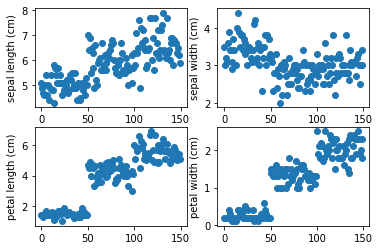

In [ ]:
'''Second step is visualization of data:'''

col_name = list(iris_df.columns)

col_index = 0
rows = 2
column = 2

fig,ax = plt.subplots(nrows=rows,ncols = column)

for i in range(rows):
  for j in range(column):
    ax[i][j].scatter(x = iris_df.index, y= iris_df[col_name[col_index]])
    ax[i][j].set_ylabel(col_name[col_index])
    col_index += 1


# Step 4. Feature Scaling.

In [ ]:
from sklearn.preprocessing import scale     #importing library for scaling

'''The purpose is to standardized the data'''

iris_data = iris_df.values

std_data = scale(iris_data)
std_data = pd.DataFrame(std_data)
std_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# Step 5. WSS Plot or Elbow Curve for Optimal cluster identification.

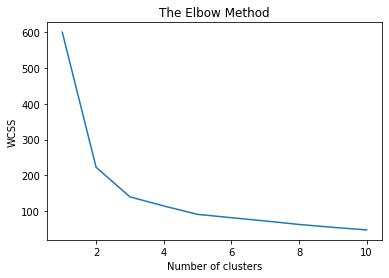

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=12)
  kmeans.fit(std_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 6. K-Means Clustering & Cluster Information.

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=12)
kmeans.fit(std_data)

ypredict = kmeans.predict(std_data)

ypredict1 = ypredict
ypredict1 += 1

cluster = pd.DataFrame(ypredict1)

iris_df['cluster'] = cluster
iris_df.groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
1,5.801887,2.673585,4.369811,1.413208
2,5.006000,3.428000,1.462000,0.246000
3,6.780851,3.095745,5.510638,1.972340


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


# Step 7. Hierarchial clustering.

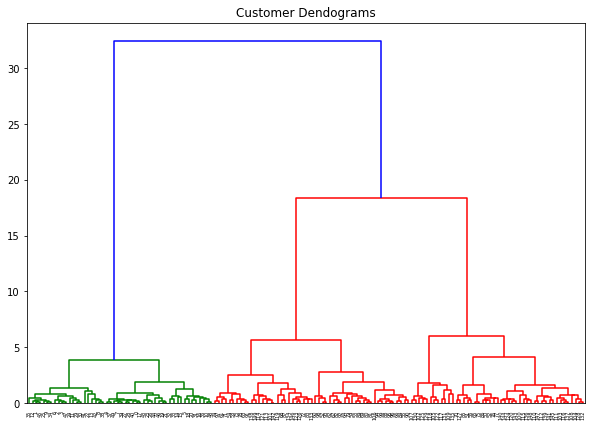

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(iris_df, method='ward'))  

# Step 8. Predict the clusters for the observations.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean')
cluster.fit_predict(iris_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Step 9. Plot the clusters.

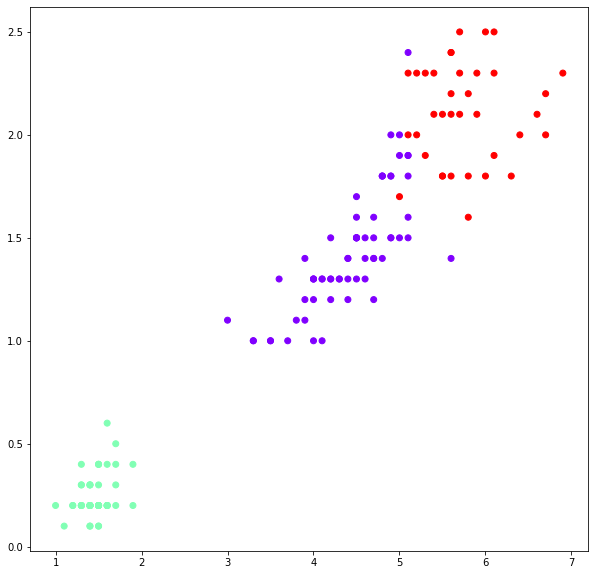

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(iris_data[:,2],iris_data[:,3],c= cluster.labels_, cmap = 'rainbow')

# Step 10. Predicting Silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score = silhouette_score(std_data,ypredict)

print(f'The silhouette score is {score}')

The silhouette score is 0.45994823920518635
